In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

Read the Data

In [2]:
sa=pd.read_csv('Salary_Data.csv')

In [3]:
sa.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [4]:
sa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 612.0 bytes


In [5]:
sa.shape

(30, 2)

In [6]:
null=sa.isnull()

In [7]:
null.head()

,YearsExperience,Salary
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False


In [8]:
null.sum()

YearsExperience    0
Salary             0
dtype: int64

<Axes: >

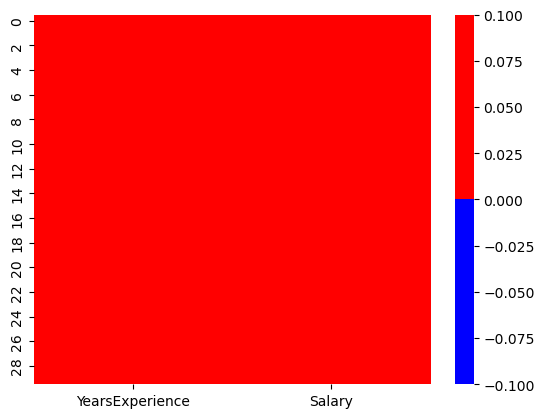

In [9]:
colours=['blue','red']
pal=sns.color_palette(colours)
sns.heatmap(sa.isnull(),cmap=pal)

In [10]:
sa.corr

<bound method DataFrame.corr of     YearsExperience    Salary
0               1.1   39343.0
1               1.3   46205.0
2               1.5   37731.0
3               2.0   43525.0
4               2.2   39891.0
5               2.9   56642.0
6               3.0   60150.0
7               3.2   54445.0
8               3.2   64445.0
9               3.7   57189.0
10              3.9   63218.0
11              4.0   55794.0
12              4.0   56957.0
13              4.1   57081.0
14              4.5   61111.0
15              4.9   67938.0
16              5.1   66029.0
17              5.3   83088.0
18              5.9   81363.0
19              6.0   93940.0
20              6.8   91738.0
21              7.1   98273.0
22              7.9  101302.0
23              8.2  113812.0
24              8.7  109431.0
25              9.0  105582.0
26              9.5  116969.0
27              9.6  112635.0
28             10.3  122391.0
29             10.5  121872.0>

<Axes: >

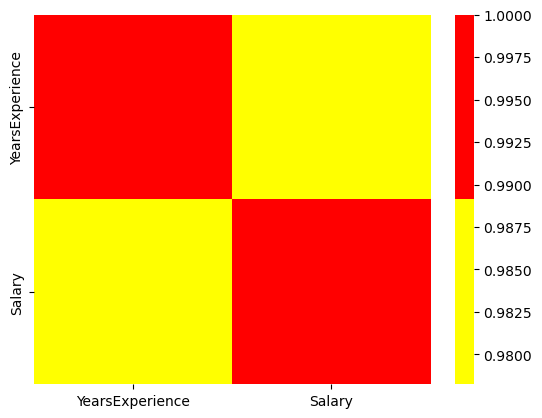

In [11]:
colours=['yellow','red']
pal=sns.color_palette(colours)
sns.heatmap(sa.corr(),cmap=pal)

In [12]:
sa.duplicated().sum()

0

plot

<Axes: xlabel='YearsExperience', ylabel='Salary'>

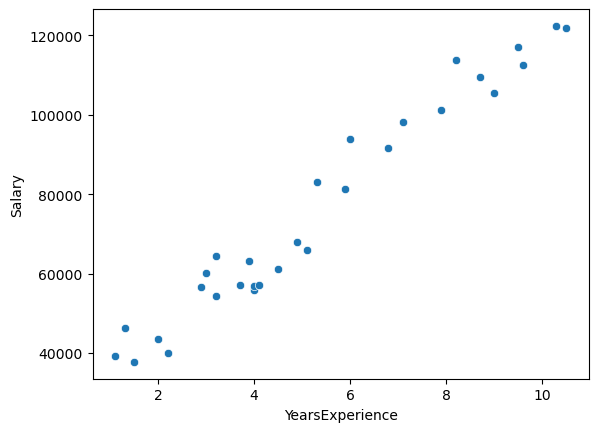

In [13]:
sns.scatterplot(x=sa['YearsExperience'],y=sa['Salary'])

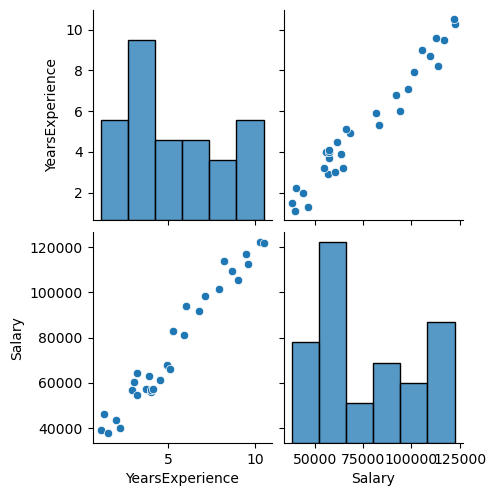

In [14]:
sns.pairplot(data=sa)
plt.show()

<Axes: xlabel='YearsExperience', ylabel='Density'>

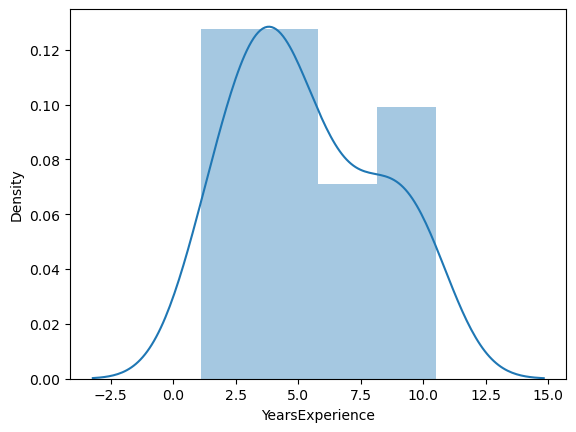

In [15]:
sns.distplot(sa['YearsExperience'])

<Axes: xlabel='Salary', ylabel='Density'>

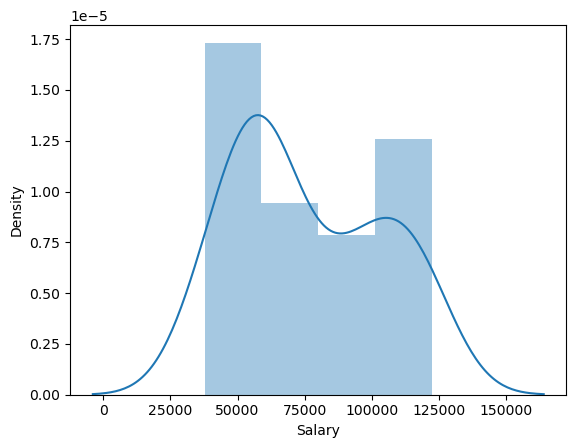

In [16]:
sns.distplot(sa['Salary'])

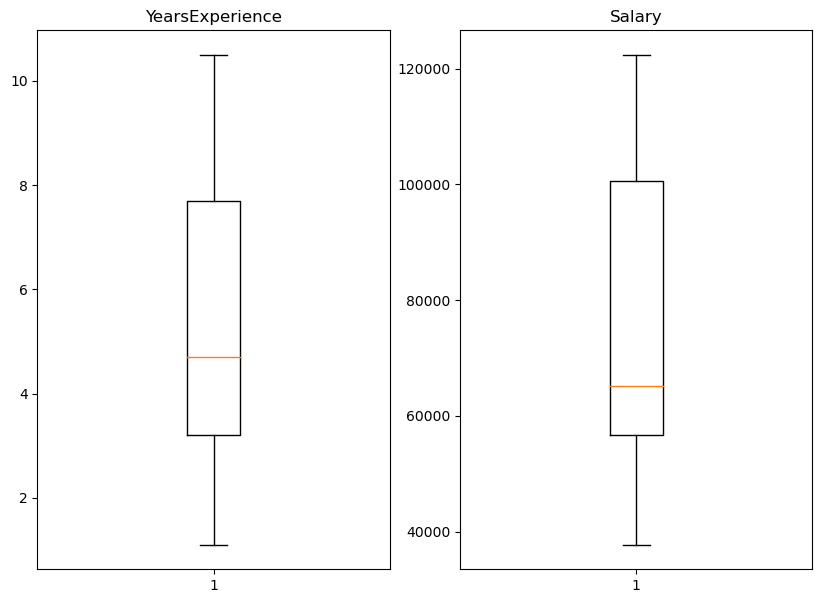

In [53]:
plt.subplots(figsize =  (10,7))
plt.subplot(121)
plt.boxplot(sa['YearsExperience'])
plt.title('YearsExperience')
plt.subplot(122)
plt.boxplot(sa['Salary'])
plt.title('Salary')
plt.show()

<Axes: xlabel='YearsExperience', ylabel='Salary'>

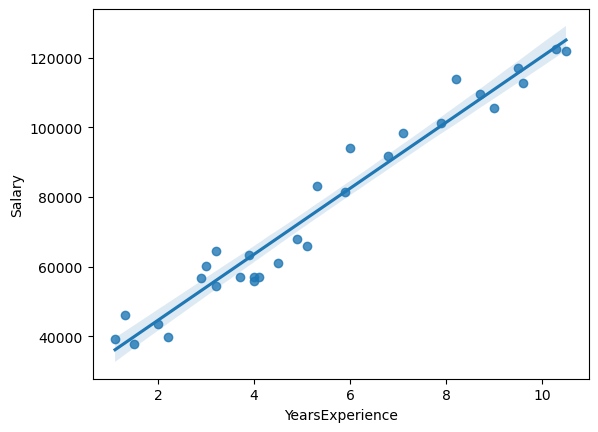

In [78]:
sns.regplot(x=sa['YearsExperience'],y=sa['Salary'])  

# Performing some basic Statistics

In [17]:
sa.YearsExperience.mean(),sa.Salary.mean()

(5.3133333333333335, 76003.0)

In [18]:
sa.YearsExperience.mode()[1],sa.Salary.mode()[1]

(4.0, 39343.0)

In [19]:
sa.YearsExperience.median(),sa.Salary.median()

(4.7, 65237.0)

In [20]:
std1=sa.YearsExperience.std()
std1

2.8378881576627184

In [21]:
v1=std1**2
v1

8.053609195402299

In [22]:
std2=sa.Salary.std()
std2

27414.4297845823

In [23]:
v1=std1**2
v1

8.053609195402299

In [24]:
v2=std2**2
v2

751550960.4137931

# log and sqr

In [25]:
result=np.log(sa.YearsExperience)[1]
print(result)

0.26236426446749106


In [81]:
result=np.log(sa.Salary)[1]
print(result)

10.74084329632214


In [26]:
cube_root_arr=(sa.YearsExperience**(1/3))[1]
cube_root_arr

1.091392883061106

In [82]:
cube_root_arr=(sa.Salary**(1/3))[1]
cube_root_arr

35.88362627284959

# import model

split the data and  train and test data


In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X=sa['YearsExperience'].values.reshape(-1,1)
Y=sa['Salary']

In [29]:
X[:5]

array([[1.1],
       [1.3],
       [1.5],
       [2. ],
       [2.2]])

In [30]:
Y[:5]

0    39343.0
1    46205.0
2    37731.0
3    43525.0
4    39891.0
Name: Salary, dtype: float64

In [31]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=40)
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((24, 1), (6, 1), (24,), (6,))

Build the model


In [54]:
from sklearn.linear_model import LinearRegression

In [55]:
log=LinearRegression()

In [56]:
log.fit(X_train,Y_train)

LinearRegression()

train model

In [57]:
Y_pred=log.predict(X_train)
Y_pred

array([ 90558.04129819,  46068.46412256, 124852.09037106,  93338.63987166,
        64605.78794574,  47922.19650488,  57190.85841647,  76655.0484308 ,
       115583.42845947, 100753.56940093,  37726.66840213,  61825.18937226,
        63678.92175458, 103534.16797441, 122998.35798875,  64605.78794574,
        39580.40078445,  82216.24557776, 110949.09750368, 108168.4989302 ,
        54410.25984299,  57190.85841647, 116510.29465063,  55337.12603415])

test model

In [58]:
X_pred=log.predict(X_test)
X_pred

array([41434.13316677, 74801.31604849, 83143.11176892, 69240.11890153,
       72947.58366617, 65532.6541369 ])

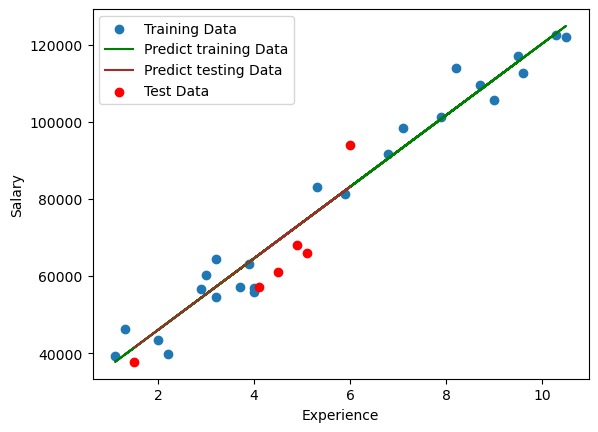

In [80]:
plt.scatter(X_train, Y_train, label='Training Data')
plt.plot(X_train,Y_pred,color='green',label="Predict training Data")
plt.plot(X_test,X_pred,color='brown',label="Predict testing Data")
plt.scatter(X_test, Y_test, color='red', label='Test Data')
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.legend()
plt.show()

find the metrics for regression

In [60]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [61]:
train_mse=mean_squared_error(Y_train,Y_pred)
train_mse

24750210.848493647

In [62]:
test_mse=mean_squared_error(Y_test,X_pred)

In [63]:
test_mse

61641413.30887977

In [64]:
train_rmse=np.sqrt(train_mse)
test_rmse=np.sqrt(test_mse)

In [65]:
train_rmse,train_rmse

(4974.958376558908, 4974.958376558908)

In [66]:
Y_train.head()

20     91738.0
3      43525.0
29    121872.0
21     98273.0
11     55794.0
Name: Salary, dtype: float64

In [67]:
np.random.rand(10)

array([0.11059314, 0.14031119, 0.92457167, 0.17836669, 0.32808893,
       0.62729776, 0.92262867, 0.05627885, 0.06156442, 0.95248883])

In [68]:
new_data=pd.Series([9,5,7])

In [69]:
data_pred=pd.DataFrame(new_data,columns=['Experience'])
data_pred

,Experience
0,9
1,5
2,7


In [70]:
log.predict(data_pred)

array([110949.09750368,  73874.44985733,  92411.7736805 ])

## math function

In [72]:
import math

In [73]:
train_rmse=math.sqrt(train_mse)

In [74]:
test_rmse=math.sqrt(test_mse)

In [75]:
train_rmse,test_rmse

(4974.958376558908, 7851.204576934661)